In [1]:
import secrets
import string
import pandas as pd
import hashlib
import base64
import matplotlib.pyplot as plt



In [2]:
csv_path = "../result/output.csv"

In [3]:
total = 0
file_path = csv_path
data = pd.read_csv(file_path)

total=len(data)


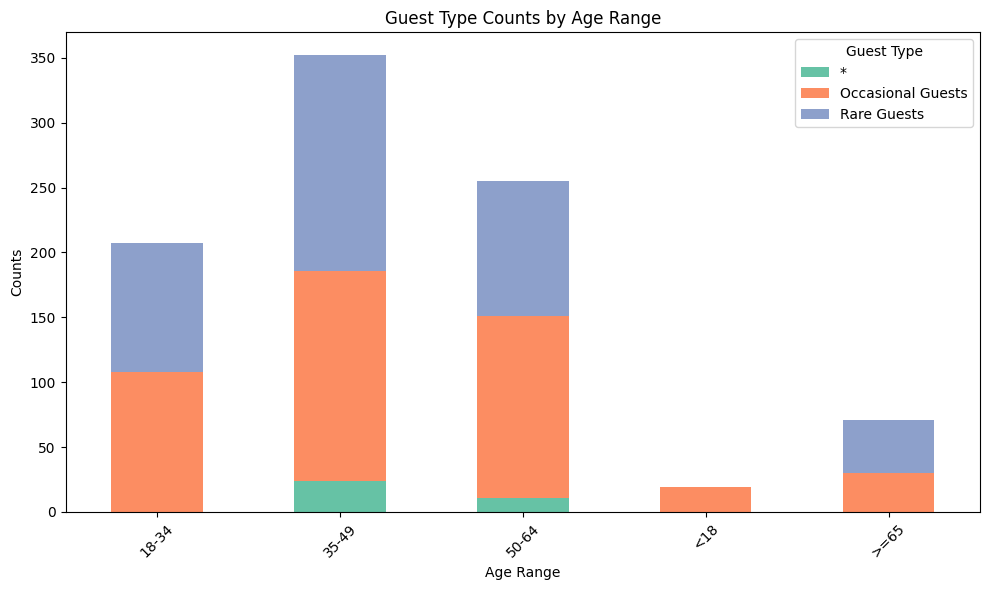

In [15]:
# 1. Guest Type Counts by Age Range
import brewer2mpl
age_guest_type_counts = data.groupby(['Age', 'Number of overnight stays']).size().unstack(fill_value=0)
bmap = brewer2mpl.get_map("Set2", "qualitative", 7)
colors = bmap.mpl_colors
age_guest_type_counts.plot(kind='bar', figsize=(10, 6), color=colors, stacked=True)
plt.title('Guest Type Counts by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Guest Type')
plt.tight_layout()
plt.show()


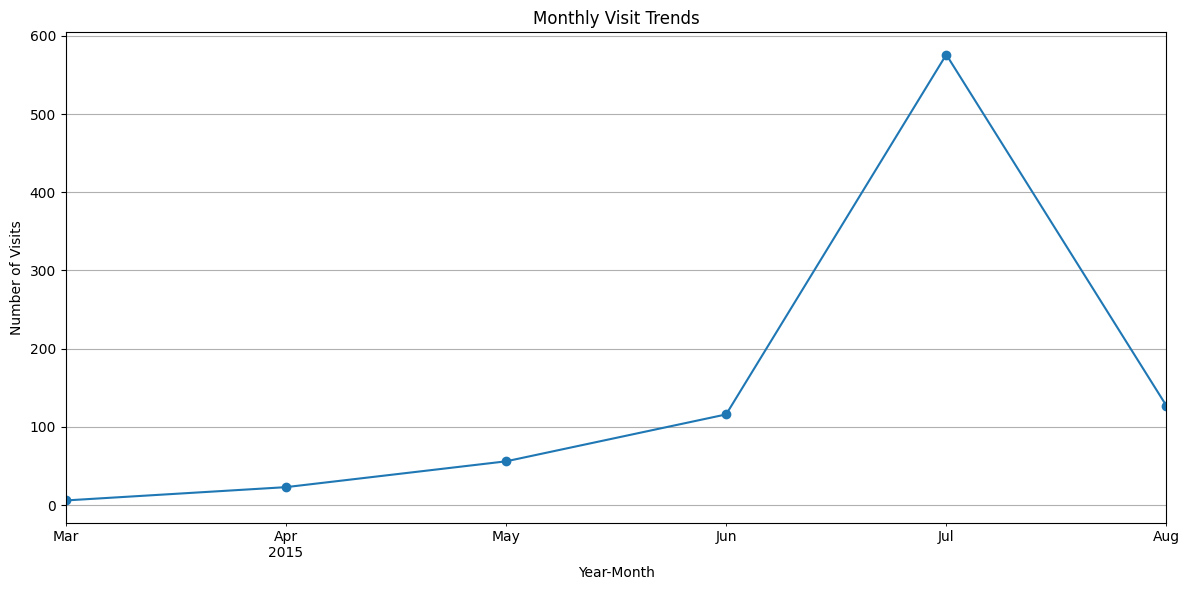

In [16]:

# 1. Time Trend Analysis: Examine visit trends over different periods (e.g., monthly or yearly) to see if there are specific times when visitor numbers increase.
data['Visitation Date'] = pd.to_datetime(data['Visitation Date'])
data['Year-Month'] = data['Visitation Date'].dt.to_period('M')


monthly_visits = data.groupby('Year-Month').size()


plt.figure(figsize=(12, 6))
monthly_visits.plot(kind='line', marker='o')
plt.title('Monthly Visit Trends')
plt.xlabel('Year-Month')
plt.ylabel('Number of Visits')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

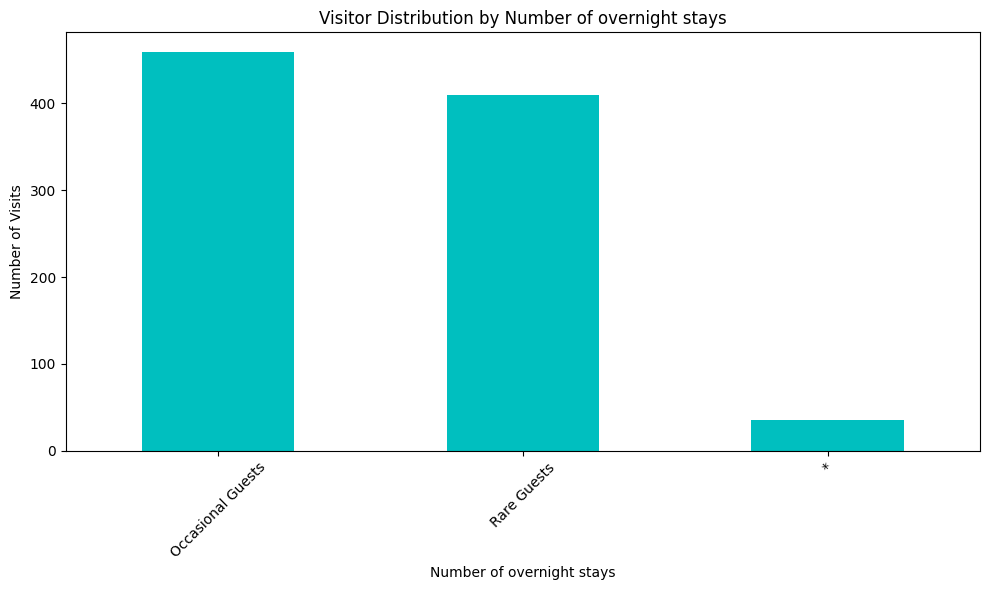

In [18]:
# 2. 'Number of overnight stays' Visitor Distribution: Analyze the distribution of visitors from different 'Number of overnight stays' to understand which 'Number of overnight stays' are the most popular destinations.
country_visits = data.groupby('Number of overnight stays').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
country_visits.plot(kind='bar', color='c')
plt.title('Visitor Distribution by Number of overnight stays')
plt.xlabel('Number of overnight stays')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

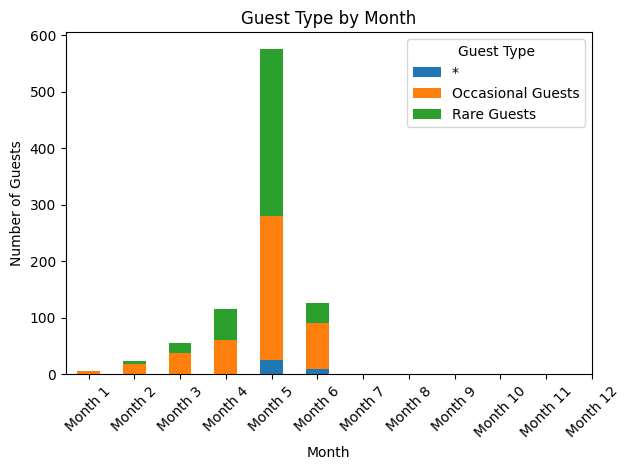

In [24]:

# 3. Relationship Between Time and Guest Type: Analyze the relationship between visit dates and guest types to see if certain times attract specific types of visitors.
data['Visitation Date'] = pd.to_datetime(data['Visitation Date'])
data['Month'] = data['Visitation Date'].dt.month

month_guest_type = data.groupby(['Month', 'Number of overnight stays']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
month_guest_type.plot(kind='bar', stacked=True)
plt.title('Guest Type by Month')
plt.xlabel('Month')
plt.ylabel('Number of Guests')
plt.legend(title='Guest Type')
plt.xticks(ticks=range(12), labels=[f'Month {i+1}' for i in range(12)], rotation=45)
plt.tight_layout()
plt.show()

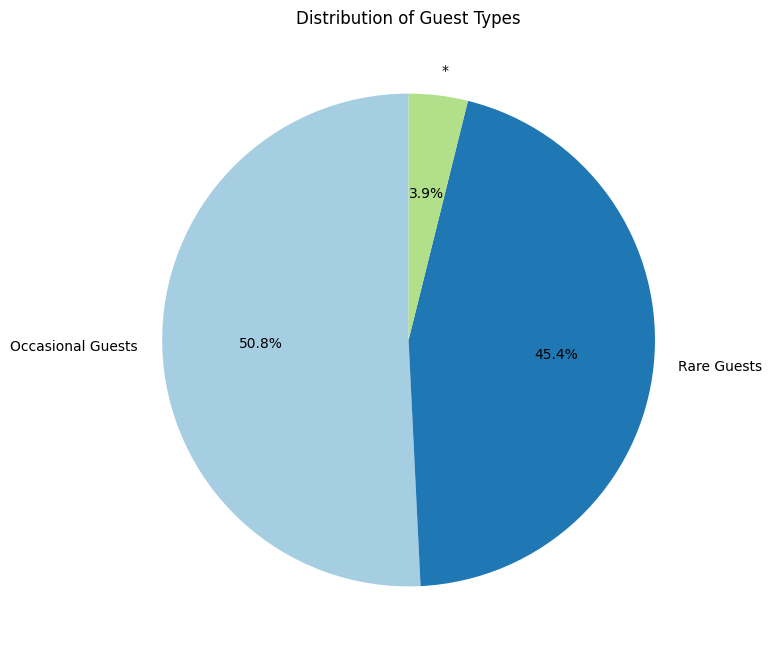

In [20]:
# 1. Proportion of Guest Types: Shows the proportion of different guest types in the total number of visits.

guest_type_counts = data['Number of overnight stays'].value_counts()

plt.figure(figsize=(8, 8))
guest_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(guest_type_counts))))
plt.title('Distribution of Guest Types')
plt.ylabel('')
plt.show()

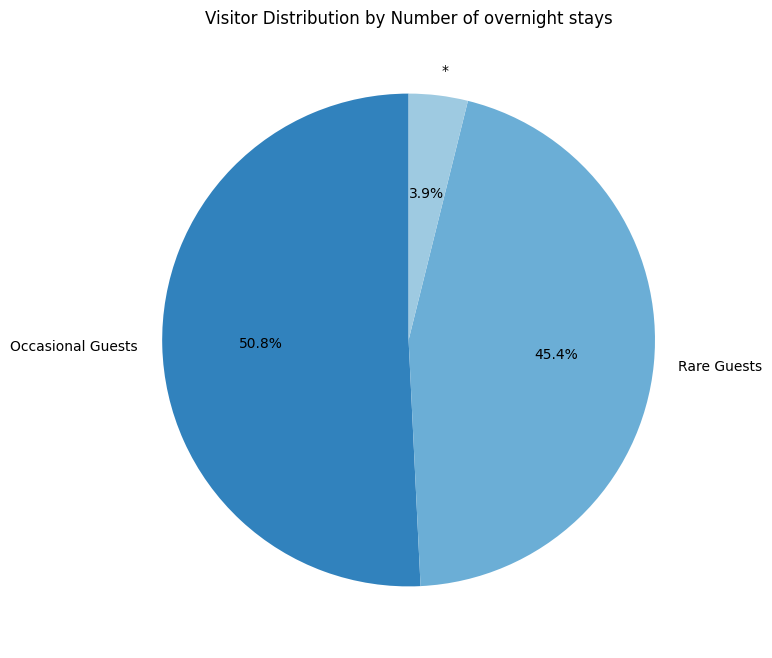

In [23]:

# 2. Visit Proportion by Country: Shows the share of each different "Number of overnight stays" in the total number of visits.
country_counts = data['Number of overnight stays'].value_counts()

plt.figure(figsize=(8, 8))
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20c(range(len(country_counts))))
plt.title('Visitor Distribution by Number of overnight stays')
plt.ylabel('')
plt.show()

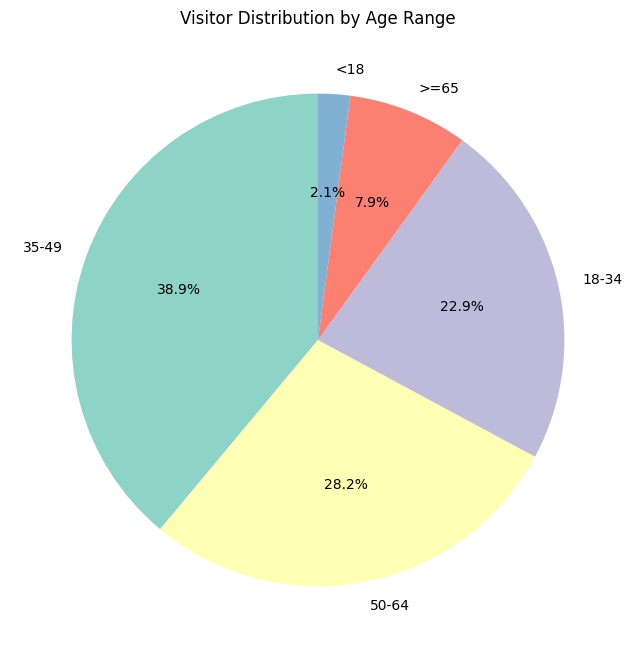

In [22]:

# 3. Visit Proportion by Age Range: Shows the proportion of visitors from different age ranges in the total number.
age_counts = data['Age'].value_counts()

plt.figure(figsize=(8, 8))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3(range(len(age_counts))))
plt.title('Visitor Distribution by Age Range')
plt.ylabel('') 
plt.show()